In [1]:
versioninfo()

Julia Version 1.0.3
Commit 099e826241 (2018-12-18 01:34 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, skylake)


In [2]:
using DifferentialEquations, ParameterizedFunctions, PyPlot, Printf

In [3]:
f2 = @ode_def fulltwoloop begin
    # note all couplings are for squared, i.e. "g1"==g1^2, except l = lambda
    # note g1^2 = 5/3*gy^2
    dg1 = g1^2/(4*pi)^2*(41/10) +
          g1^2/(4*pi)^4*(44/5*g3 +27/10*g2 +199/50*g1 -17/10*yt -1/2*yb -3/2*ytau)
    dg2 = g2^2/(4*pi)^2*(-19/6) +
          g2^2/(4*pi)^4*(12*g3 +35/6*g2 +9/10*g1 -3/2*yt -3/2*yb -1/2*ytau)
    dg3 = g3^2/(4*pi)^2*(-7) +
          g3^2/(4*pi)^4*(-26*g3 +9/2*g2 +11/10*g1 -2*yt -2*yb)
    dyt = yt/(4*pi)^2*(9/2*yt +3/2*yb +ytau -8*g3 -9/4*g2 -17/20*g1) + 
          yt/(4*pi)^4*(yt*(-12*yt -11/4*yb -9/4*ytau -12*l +36*g3 +225/16*g2 +393/80*g1) +
                        yb*(-1/4*yb +5/4*ytau +4*g3 +99/16*g2 +7/80*g1) +ytau*(-9/4*ytau +15/8*g2 +15/8*g1) +
                        6*l^2 -108*g3^2 -23/4*g2^2 +1187/600*g1^2 +9*g3*g2 + 19/15*g3*g1 - 9/20*g2*g1)
    
#     dyb = yb/(4*pi)^2*(3/2*yt +9/2*yb +ytau -8*g3 -9/4*g2 -1/4*g1) +
#           yb/(4*pi)^4*(yt*(-1/4*yt -11/4*yb +5/4*ytau +4*g3 +99/16*g2 +91/80*g1) +
#                         yb*(-12*yb -9/4*ytau -12*l +36*g3 +225/16*g2 +237/80*g1) + 
#                         ytau*(-9/4*ytau +15/8*g2 +15/8*g1) +
#                         6*l^2 -108*g3^2 -23/4*g2^2 -127/600*g1^2 +9*g3*g2 +31/15*g3*g1 -27/20*g2*g1)
#     dytau = ytau/(4*pi)^2*(3*yt +3*yb +5/2*ytau -9/4*g2 -9/4*g1) +
#             ytau/(4*pi)^4*(6*l^2 -23/4*g2^2 +1371/200*g1^2 +27/20*g2*g1 + 
#                         yt*(-27/4*yt +3/2*yb -27/4*ytau +20*g3 +45/8*g2 +17/8*g1) +
#                         yb*(-27/4*yb -27/4*ytau +20*g3 +45/8*g2 +5/8*g1) + 
#                         ytau*(-3*ytau -12*l +165/16*g2 +537/80*g1))
    
    dm  = m/(4*pi)^2*(6*l +3*yt +3*yb +ytau -9/4*g2 -9/20*g1) +
          m/(4*pi)^4*(l*(-30*l -36*yt -36*yb -12*ytau +36*g2 +36/5*g1) + 
                        yt*(-27/4*yt -21/2*yb +20*g3 +45/8*g2 +17/8*g1) + 
                        yb*(-27/4*yb +20*g3 +45/8*g2 +5/8*g1) + 
                        ytau*(-9/4*ytau +15/8*g2 +15/8*g1) -145/32*g2^2 +1671/800*g1^2 +9/16*g2*g1)
    dl  = 1/(4*pi)^2*(l*(12*l +6*yt +6*yb +2*ytau -9/2*g2 -9/10*g1) +
                        -3*yt^2 -3*yb^2 -ytau^2 +9/16*g2^2 +27/400*g1^2 +9/40*g2*g1) + 
          1/(4*pi)^4*(l^2*(-156*l -72*yt -72*yb -24*ytau +54*g2 +54/5*g1) + 
                        l*yt*(-3/2*yt -21*yb +40*g3 +45/4*g2 +17/4*g1) + 
                        l*yb*(-3/2*yb +40*g3 +45/4*g2 +5/4*g1) +l*ytau*(-1/2*yt +15/4*g2 +15/4*g1) +
                        l*(-73/16*g2^2 +1887/400*g1^2 +117/40*g2*g1) + 
                        yt^2*(15*yt -3*yb -16*g3 -4/5*g1) +yt*(-9/8*g2^2 -171/200*g1^2 +63/20*g1*g2) +
                        yb^2*(-3*yt +15*yb -16*g3 +2/5*g1) + yb*(-9/8*g2^2 +9/40*g1^2 +27/20*g1*g2) +
                        ytau^2*(5*ytau -6/5*g1) +ytau*(-3/8*g2^2 -9/8*g1^2 +33/20*g2*g1) +
                        305/32*g2^3 -3411/4000*g1^3 -289/160*g2^2*g1 -1677/800*g2*g1^2)
end ytau yb
;

In [4]:
f1 = @ode_def fulloneloop begin
    # note all couplings are for squared, i.e. "g1"==g1^2, except l = lambda
    # note g1^2 = 5/3*gy^2
    dg1 = g1^2/(4*pi)^2*(41/10)
    dg2 = g2^2/(4*pi)^2*(-19/6)
    dg3 = g3^2/(4*pi)^2*(-7)
    dyt = yt/(4*pi)^2*(9/2*yt +3/2*yb +ytau -8*g3 -9/4*g2 -17/20*g1) 
    dm  = m/(4*pi)^2*(6*l +3*yt +3*yb +ytau -9/4*g2 -9/20*g1)
    dl  = 1/(4*pi)^2*(l*(12*l +6*yt +6*yb +2*ytau -9/2*g2 -9/10*g1) +
                        -3*yt^2 -3*yb^2 -ytau^2 +9/16*g2^2 +27/400*g1^2 +9/40*g2*g1)
end ytau yb
;

In [5]:
# list of observables
obsmw = 80.384
obsmz = 91.1876
obsmh = 125.15
obsmt = 173.34
obsa3 = 0.1184

gy0 = 0.35830 + 0.00011*(obsmt-173.34) - 0.00020/0.0014*(obsmw-80.384)
g20 = 0.64779 + 0.00004*(obsmt-173.34) + 0.00011/0.0014*(obsmw-80.384)
g30 = 1.1666 + 0.00314/0.0007*(obsa3-0.1184)-0.00046*(obsmt-173.34)
yt0 = 0.93690 + 0.00556*(obsmt-173.34) - 0.00042/0.0007*(obsa3-0.1184)
m0 = 131.55 + 0.94*(obsmh-125.15) + 0.17*(obsmt-173.34)
l0 = 0.12604 + 0.00206*(obsmh-125.15) - 0.00004*(obsmt-173.34)

mplanck = 2.435*10^18
maxmu = 10000.
muspan = (2*log(obsmt),2*log(maxmu))
mpspan = (2*log(obsmt),2*log(mplanck));

In [6]:
initial = [5/3*gy0^2 ; g20^2 ; g30^2 ; yt0^2 ; m0^2 ; l0]

result = zeros(5,length(initial)+2)
temp = initial
# gy g2 g3 yt l v mt mh
result[1,:] = [sqrt(temp[1]*3/5) ; sqrt.(temp[2:4]) ; temp[6] ; sqrt(temp[5]/2/temp[6]) ; 
                sqrt(temp[4]*temp[5]/4/temp[6]) ; sqrt(temp[5])]
coeff = [0.,0.] # for [ytau, yb]
;

In [7]:
# expression for checking whether we can get back the initial values if we run from mplanck to mtop
# should specify running before eval(check)
check = quote
    prob = ODEProblem(running, initial, mpspan, coeff)
    final = solve(prob,reltol=1e-6,abstol=1e-6)[end]
    backspan = (2*log(mplanck),2*log(obsmt))
    prob = ODEProblem(running, final, backspan, coeff)
    sol = solve(prob,reltol=1e-6,abstol=1e-6)
    @printf "relative error = %.6f \n" sum((sol[end]-initial)./initial)
end
;

In [8]:
running = f1
eval(check)
running = f2
eval(check)
;

relative error = -0.000001 
relative error = -0.000001 


In [9]:
at3TeV = quote
    prob = ODEProblem(running, initial, muspan, coeff)
    sol = solve(prob,reltol=1e-6,abstol=1e-6)
    temp = sol(2*log(3000))
    output = [sqrt(temp[1]*3/5) ; sqrt.(temp[2:4]) ; temp[6] ; sqrt(temp[5]/2/temp[6]) ; 
                sqrt(temp[4]*temp[5]/4/temp[6]) ; sqrt(temp[5])]
    @printf """gy = %.3f
    g2 = %.3f
    g3 = %.3f
    yt = %.3f
    l  = %.3f
    v  = %.3f
    mt = %.3f
    mh = %.3f""" output...
end
;

In [10]:
running = f1
eval(at3TeV)
result[2,:] = output
;

gy = 0.364
g2 = 0.633
g3 = 1.006
yt = 0.826
l  = 0.080
v  = 341.140
mt = 199.192
mh = 136.143

In [11]:
running = f2
eval(at3TeV)
result[3,:] = output
;

gy = 0.364
g2 = 0.633
g3 = 1.003
yt = 0.815
l  = 0.081
v  = 338.280
mt = 194.903
mh = 136.287

In [12]:
# no running in l=lambda
y2 = @ode_def yttwoloop begin
    # note all couplings are for squared, i.e. "g1"==g1^2, except l = lambda
    # note g1^2 = 5/3*gy^2
    dg1 = g1^2/(4*pi)^2*(41/10) +
          g1^2/(4*pi)^4*(44/5*g3 +27/10*g2 +199/50*g1 -17/10*yt -1/2*yb -3/2*ytau)
    dg2 = g2^2/(4*pi)^2*(-19/6) +
          g2^2/(4*pi)^4*(12*g3 +35/6*g2 +9/10*g1 -3/2*yt -3/2*yb -1/2*ytau)
    dg3 = g3^2/(4*pi)^2*(-7) +
          g3^2/(4*pi)^4*(-26*g3 +9/2*g2 +11/10*g1 -2*yt -2*yb)
    dyt = yt/(4*pi)^2*(9/2*yt +3/2*yb +ytau -8*g3 -9/4*g2 -17/20*g1) + 
          yt/(4*pi)^4*(yt*(-12*yt -11/4*yb -9/4*ytau -12*l +36*g3 +225/16*g2 +393/80*g1) +
                        yb*(-1/4*yb +5/4*ytau +4*g3 +99/16*g2 +7/80*g1) +ytau*(-9/4*ytau +15/8*g2 +15/8*g1) +
                        6*l^2 -108*g3^2 -23/4*g2^2 +1187/600*g1^2 +9*g3*g2 + 19/15*g3*g1 - 9/20*g2*g1)
    dm  = m/(4*pi)^2*(6*l +3*yt +3*yb +ytau -9/4*g2 -9/20*g1) +
          m/(4*pi)^4*(l*(-30*l -36*yt -36*yb -12*ytau +36*g2 +36/5*g1) + 
                        yt*(-27/4*yt -21/2*yb +20*g3 +45/8*g2 +17/8*g1) + 
                        yb*(-27/4*yb +20*g3 +45/8*g2 +5/8*g1) + 
                        ytau*(-9/4*ytau +15/8*g2 +15/8*g1) -145/32*g2^2 +1671/800*g1^2 +9/16*g2*g1)
end ytau yb l
;

In [13]:
y1 = @ode_def ytoneloop begin
    # note all couplings are for squared, i.e. "g1"==g1^2, except l = lambda
    # note g1^2 = 5/3*gy^2
    dg1 = g1^2/(4*pi)^2*(41/10)
    dg2 = g2^2/(4*pi)^2*(-19/6)
    dg3 = g3^2/(4*pi)^2*(-7)
    dyt = yt/(4*pi)^2*(9/2*yt +3/2*yb +ytau -8*g3 -9/4*g2 -17/20*g1) 
    dm  = m/(4*pi)^2*(6*l +3*yt +3*yb +ytau -9/4*g2 -9/20*g1)
end ytau yb l
;

In [14]:
initial = [5/3*gy0^2 ; g20^2 ; g30^2 ; yt0^2 ; m0^2]
# gy g2 g3 yt l v mt mh
result[4,5] = l0; result[5,5] = l0;

coeff = [0.,0.,0.12604] # for [ytau, yb, l]
;

In [15]:
running = y1
eval(check)
running = y2
eval(check)
;

relative error = -0.000000 
relative error = -0.000000 


In [16]:
at3TeV = quote
    prob = ODEProblem(running, initial, muspan, coeff)
    sol = solve(prob,reltol=1e-6,abstol=1e-6)
    temp = [sol(2*log(3000)) ; coeff[3]]
    output = [sqrt(temp[1]*3/5) ; sqrt.(temp[2:4]) ; temp[6] ; sqrt(temp[5]/2/temp[6]) ; 
                sqrt(temp[4]*temp[5]/4/temp[6]) ; sqrt(temp[5])]
    @printf """gy = %.3f
    g2 = %.3f
    g3 = %.3f
    yt = %.3f
    l  = %.3f
    v  = %.3f
    mt = %.3f
    mh = %.3f""" output...
end
;

In [17]:
running = y1
eval(at3TeV)
result[4,:] = output
;

gy = 0.364
g2 = 0.633
g3 = 1.006
yt = 0.826
l  = 0.126
v  = 271.891
mt = 158.757
mh = 136.510

In [18]:
running = y2
eval(at3TeV)
result[5,:] = output
;

gy = 0.364
g2 = 0.633
g3 = 1.003
yt = 0.815
l  = 0.126
v  = 272.150
mt = 156.799
mh = 136.640

In [19]:
function mydisp(x)
    show(IOContext(stdout), "text/plain", x)
end

mydisp (generic function with 1 method)

In [20]:
mydisp([["list" ; "gy" ; "g2" ; "g3" ; "yt" ; "lambda" ; "vev" ; "mt" ; "mh"] ["at mt"  "fulloneloop"  "fulltwoloop"  "ytoneloopt"  "yttwoloop" ;
    result']])

9×6 Array{Any,2}:
 "list"       "at mt"     "fulloneloop"     "fulltwoloop"     "ytoneloopt"     "yttwoloop"
 "gy"        0.3583      0.364114          0.364214          0.364114         0.364214    
 "g2"        0.64779     0.632786          0.633234          0.632786         0.633234    
 "g3"        1.1666      1.00629           1.00284           1.00629          1.00284     
 "yt"        0.9369      0.825759          0.814814          0.825759         0.814796    
 "lambda"    0.12604     0.079633          0.0811571         0.12604          0.12604     
 "vev"     262.012     341.14            338.28            271.891          272.15        
 "mt"      173.58      199.192           194.903           158.757          156.799       
 "mh"      131.55      136.143           136.287           136.51           136.64        

In [21]:
exp(-0.94^2*3/4/4/pi/pi*log(3000/246)/2)

0.9792271122048731

In [22]:
exp(-0.84^2*3/4/4/pi/pi*log(3000/246)/2)

0.9833767815749506

In [23]:
g31 = @ode_def g3oneloop begin
    # note all couplings are for squared, i.e. "g1"==g1^2, except l = lambda
    # note g1^2 = 5/3*gy^2
    dg3 = g3^2/(4*pi)^2*(-7)
end
;

In [24]:
# list of observables
obsmw = 80.384
obsmz = 91.1876
obsmh = 125.15
obsmt = 173.34
obsa3 = 0.1184

gy0 = 0.35830 + 0.00011*(obsmt-173.34) - 0.00020/0.0014*(obsmw-80.384)
g20 = 0.64779 + 0.00004*(obsmt-173.34) + 0.00011/0.0014*(obsmw-80.384)
g30 = 1.1666 + 0.00314/0.0007*(obsa3-0.1184)-0.00046*(obsmt-173.34)
l0 = 0.12604 + 0.00206*(obsmh-125.15) - 0.00004*(obsmt-173.34)
m0 = 131.55 + 0.94*(obsmh-125.15) + 0.17*(obsmt-173.34)
yt0 = 0.93690 + 0.00556*(obsmt-173.34) - 0.00042/0.0007*(obsa3-0.1184);

In [25]:
running = g31
prob = ODEProblem(running, [g30^2], (2*log(obsmt),2*log(4.2)))
sol = solve(prob,reltol=1e-6,abstol=1e-6)
sqrt.([sol[1] sol[end]])

1×2 Array{Float64,2}:
 1.1666  1.57142

In [26]:
b0 = 11-2/3*5;
mb0 = 4.2*(sol[end][1]/sol[1][1])^(-4/b0)
yb0 = sqrt(2)*mb0/246.21971
[mb0 yb0]

1×2 Array{Float64,2}:
 3.07789  0.0176785

In [27]:
b1 = @ode_def boneloop begin
    # note all couplings are for squared, i.e. "g1"==g1^2, except l = lambda
    # note g1^2 = 5/3*gy^2
    dg1 = g1^2/(4*pi)^2*(41/10)
    dg2 = g2^2/(4*pi)^2*(-19/6)
    dg3 = g3^2/(4*pi)^2*(-7)
    dyt = yt/(4*pi)^2*(9/2*yt +3/2*yb +ytau -8*g3 -9/4*g2 -17/20*g1)
    
    dyb = yb/(4*pi)^2*(3/2*yt +9/2*yb +ytau -8*g3 -9/4*g2 -1/4*g1)
    
    dm  = m/(4*pi)^2*(6*l +3*yt +3*yb +ytau -9/4*g2 -9/20*g1)
end ytau l
;

In [28]:
running = b1
initial = [5/3*gy0^2 ; g20^2 ; g30^2 ; yt0^2 ; yb0^2 ; m0^2]
coeff = [0., 0.12604]
prob = ODEProblem(running, initial, (2*log(obsmt),2*log(3000)), coeff)
sol = solve(prob,reltol=1e-6,abstol=1e-6)
temp = sol(2*log(2000))
[sqrt(temp[1]*3/5) ; sqrt.(temp[2:6]) ; l0]

7-element Array{Float64,1}:
   0.3632694691180812  
   0.6348564119645798  
   1.0251158589233993  
   0.8390706551100133  
   0.015297055200858029
 135.87112091666634    
   0.12604             

In [29]:
temp = [temp ; l0]

7-element Array{Float64,1}:
     0.21994117865555426   
     0.40304266381254017   
     1.0508625242162588    
     0.704039564266747     
     0.00023399989781809765
 18460.961499151363        
     0.12604               

In [30]:
vev = sqrt(temp[6]/2/temp[7])/1000
mw = sqrt(temp[2])/2*vev
mz = sqrt(temp[2]+temp[1]*3/5)/2*vev
mt = sqrt(temp[4]/2)*vev
mb = sqrt(temp[5]/2)*vev
mh = sqrt(temp[6])/1000
[vev ; mw ; mz ; mt ; mb ; mh]

6-element Array{Float64,1}:
 0.27061879954682805 
 0.08590204004523055 
 0.09897097536608156 
 0.16056153007033436 
 0.002927189234496708
 0.13587112091666634 

In [31]:
prob = ODEProblem(running, initial, (2*log(obsmt),2*log(maxmu)), coeff)
sol = solve(prob,reltol=1e-6,abstol=1e-6)

retcode: Success
Interpolation: 3rd order Hermite
t: 6-element Array{Float64,1}:
 10.310509967412397
 10.437974653540207
 11.49142979475892 
 13.532908699913262
 16.145031240435433
 18.420680743952367
u: 6-element Array{Array{Float64,1},1}:
 [0.213965, 0.419632, 1.36096, 0.877782, 0.00031253, 17305.4] 
 [0.214116, 0.419182, 1.35057, 0.872108, 0.000309885, 17338.1]
 [0.215378, 0.415503, 1.27045, 0.828026, 0.000289511, 17602.8]
 [0.217865, 0.408553, 1.13944, 0.754669, 0.000256332, 18087.9]
 [0.221132, 0.399993, 1.00663, 0.678411, 0.000222884, 18663.6]
 [0.22406, 0.392823, 0.913838, 0.623795, 0.000199644, 19130.8]

In [32]:
nn = 100;
gtable = zeros(6,nn)
logx = collect(range(log(obsmt),stop=log(maxmu),length=nn))
x = exp.(logx)
for i=1:100
    temp = sol(2*logx[i])
    gtable[1:5,i] = sqrt.(temp[1:5])
    gtable[6,i] = temp[6]
end

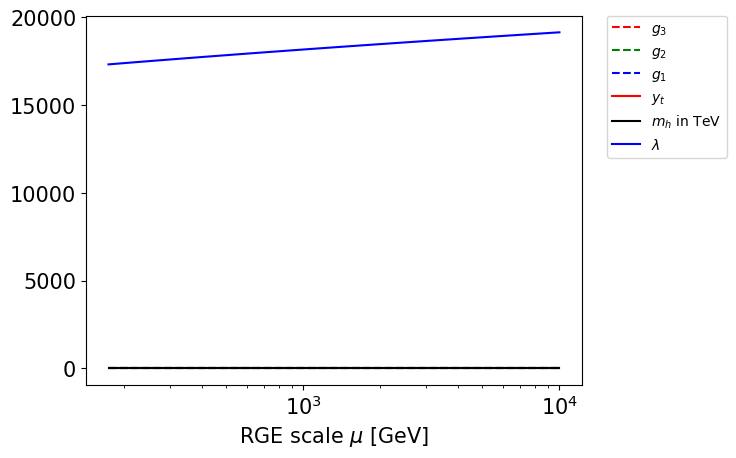

PyObject <matplotlib.legend.Legend object at 0x7f12489874e0>

In [33]:
fig, ax = subplots()
ax[:semilogx](x,gtable[3,:], color="r",linestyle="--",label=L"g_3")
ax[:semilogx](x,gtable[2,:], color="g",linestyle="--",label=L"g_2")
ax[:semilogx](x,gtable[1,:], color="b",linestyle="--",label=L"g_1")
ax[:semilogx](x,gtable[4,:], color="r",linestyle="-",label=L"y_t")
ax[:semilogx](x,gtable[5,:]/1000, color="k",linestyle="-",label=L"$m_h$ in TeV")
ax[:semilogx](x,gtable[6,:], color="b",linestyle="-",label=L"\lambda")

ax[:tick_params]("both",labelsize=15) 

xlabel(L"RGE scale $\mu $ [GeV]", fontsize=15)
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=1)
# ax[:legend](borderaxespad=0.4, fancybox=1)

In [34]:
running = y2
prob = ODEProblem(running, initial, muspan, [0.,0.,0.12604])
sol = solve(prob,reltol=1e-6,abstol=1e-6)
temp = [sol(2*log(2000)) ; m0^2 ; l0]

8-element Array{Float64,1}:
     0.22004671021684202  
     0.4035434027496434   
     1.0443272301161644   
     0.6874960486065573   
     0.0003340031506860443
 17305.402500000004       
 17305.402500000004       
     0.12604              

In [35]:
vev = sqrt(temp[5]/2/temp[6])/1000
mw = sqrt(temp[2])/2*vev
mz = sqrt(temp[2]+temp[1]*3/5)/2*vev
mt = sqrt(temp[4]/2)*vev
mh = sqrt(temp[5])/1000
[vev ; mw ; mz ; mt ; mh]

5-element Array{Float64,1}:
 9.823571976455971e-8 
 3.1202152974470754e-8
 3.594579856008362e-8 
 5.7595630504540935e-8
 1.8275753081228806e-5